# Agrupamiento de Promedios K

Comencemos con el primer modelo de **Aprendizaje No Supervisado** que veremos hoy, que se llama ***K-Means Clustering***, o en español ***Agrupamiento de Promedios K***. 

Básicamente lo que hace ***K-Means Clustering*** es identificar la cantidad de *promedios* que queramos (*K* es justamente eso, la cantidad específica que elijamos), y luego de identificar esos promedios, agrupa todos los casos de un dataframe alrededor de esos promedios.

He puesto esta imagen al principio del cuaderno para poder ayudarte a entender este concepto visualmente. Aquí tenemos a nuestros queridos *pingüinos* en un *gráfico de dispersión* que muestra cómo se ubica cada pingüino en función de las medidas de su pico (la longitud en el eje **x** y la profundidad en el eje **y**).

![](EjemploKMeansClustering.png)

Lo que yo he hecho a través de ***K-Means Clustering*** aquí, es pedirle que identifique **3 puntos** que sean el promedio de todas las demás medidas. Podría haberle pedido 1, 5 o 20, pero le he pedido 3.

Entonces ***K-Means*** ha encontrado las mejores ubicaciones para posicionar 3 puntos llamados **centroides**, y luego le ha asignado a cada punto de mi dataset (a cada pingüino) uno de esos centroides (el más cercano).

A cada grupo de pingüinos lo llamamos **cluster**, que significa *agrupamiento*, y cada cluster tiene, por supuesto su propio y único centroide.

Entonces el algoritmo K-Means sigue los siguientes pasos:
1. **Inicialización**: Se eligen una cantidad **k** de puntos aleatorios, que serán los centroides iniciales.
2. **Asignación**: Cada punto de datos es asignado al centroide más cercano.
3. **Actualización**: Se recalculan el promedio de todos los puntos asignados a ese grupo, y se reubica el centroide.
4. **Iteración**: Se repiten los pasos 2 y 3 hasta que la posición de los centroides ya no cambie significativamente.

El resultado es que los datos se dividen en grupos donde cada punto pertenece al grupo con el centroide más cercano.

¿Qué te parece si lo ponemos en práctica y conocemos el código para hacer agrupaciones por ***K-Means Clustering***?

El primer ejemplo va a ser con una base de datos inventada, para que lo veamos un poco en abstracto.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Mi base de datos en este caso va a ser un **array de dos dimensiones**, que voy a generar usando números aleatorios:

In [2]:
np.random.seed(42)
data = np.random.rand(100, 2)
data

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914],
       [0.61185289, 0.13949386],
       [0.29214465, 0.36636184],
       [0.45606998, 0.78517596],
       [0.19967378, 0.51423444],
       [0.59241457, 0.04645041],
       [0.60754485, 0.17052412],
       [0.06505159, 0.94888554],
       [0.96563203, 0.80839735],
       [0.30461377, 0.09767211],
       [0.68423303, 0.44015249],
       [0.12203823, 0.49517691],
       [0.03438852, 0.9093204 ],
       [0.25877998, 0.66252228],
       [0.31171108, 0.52006802],
       [0.54671028, 0.18485446],
       [0.96958463, 0.77513282],
       [0.93949894, 0.89482735],
       [0.59789998, 0.92187424],
       [0.0884925 , 0.19598286],
       [0.04522729, 0.32533033],
       [0.

¿Cómo he creado ese array? Primero random establece la semilla del generador de números aleatorios de **NumPy** a un número fijo, en este caso `42`. La semilla es un valor inicial a partir del cual se comienza la generación de secuencias de números aleatorios. Podría hacerlo sin semilla en este caso, pero lo hago para asegurarme de que tu y yo veamos los mismos resultados al hacer la práctica.

Luego con `data = np.random.rand(100, 2)`he generado una matriz de números aleatorios con una distribución uniforme en el rango que va desde **0** hasta **1** (es decir, entre 0 inclusive y 1 exclusivo), y que tiene **100 filas** y **2 columnas**. 

Ahora vamos a **entrenar** a un modelo **K-Means** con nuestros datos.

In [3]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data)

C:\Users\Federico\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Federico\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

Nuestro modelo ya está entrenado, ya ha generado toda la información necesaria y ha organizado los **100 registros** de datos en **clusters**, cada uno con su **centroide**.

¿Pero de qué nos sirve todo lo que ha hecho si no lo podemos ver, verdad?

Para poder representar los resultados en un gráfico, el siguiente paso es guardar los **centroides** y las **etiquetas** de los datos, en variables.

In [4]:
centroides = kmeans.cluster_centers_
centroides

array([[0.12006068, 0.90489563],
       [0.72913446, 0.22729438],
       [0.780568  , 0.70944531],
       [0.25571519, 0.19875171],
       [0.22739621, 0.59428412]])

In [5]:
etiquetas = kmeans.labels_
etiquetas

array([0, 2, 3, 0, 2, 0, 1, 3, 4, 3, 1, 3, 4, 4, 1, 1, 0, 2, 3, 1, 4, 0,
       4, 4, 1, 2, 2, 2, 3, 3, 3, 1, 4, 0, 0, 1, 0, 2, 1, 3, 2, 3, 3, 2,
       2, 4, 2, 2, 1, 3, 4, 4, 1, 4, 3, 3, 2, 2, 1, 2, 2, 3, 4, 2, 4, 3,
       3, 1, 2, 0, 1, 1, 3, 2, 3, 1, 4, 1, 2, 4, 4, 2, 0, 3, 4, 1, 1, 1,
       1, 1, 3, 2, 4, 2, 1, 0, 2, 3, 2, 2])

Y ahora sí, a visualizar nuestros datos en un gráfico.

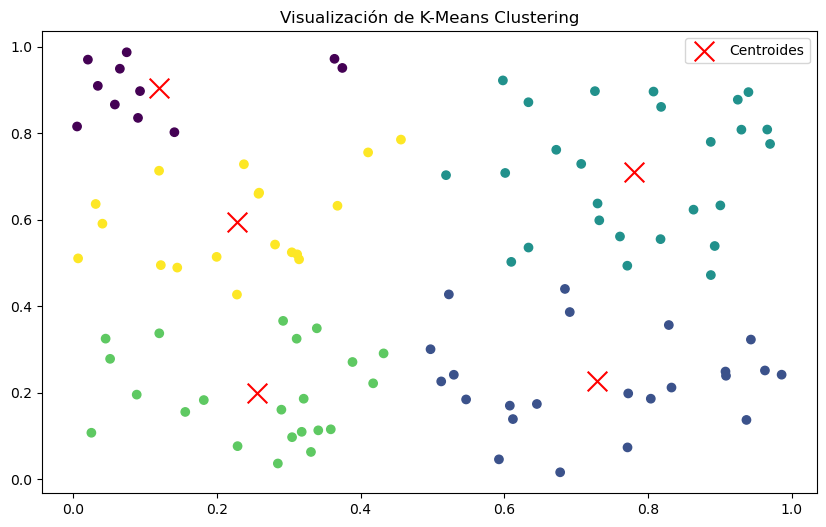

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=etiquetas, cmap='viridis', marker='o')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.title('Visualización de K-Means Clustering')
plt.legend();

Como resultado, este bloque de código ha generado una serie de **puntos aleatorios**, y luego ha aplicado ***K-Means Clustering*** de forma tal que ha dividido todos los puntos de datos en **5 grupos**, y a cada uno de ellos les ha asignado un punto promedio llamado **Centroide**. Finalmente ha expresado visualmente esos resultados con **Matplotlib**. Los centroides están marcados con una **x roja**, y los puntos están coloreados según el **cluster** al que pertenecen.

¿Te parece si repetimos este ejemplo con una base de datos menos abstracta? Llamemos a nuestros *pingüinos* y reproduzcamos la imagen que te he mostrado al comienzo de la lección.

In [7]:
pinguinos = sns.load_dataset('penguins')

Y nos aseguramos de que no hayan **valores nulos** en el dataset.

In [8]:
pinguinos.dropna(inplace=True)

Para este ejemplo, vamos a seleccionar solo **dos características** para facilitar la visualización.

In [9]:
data = pinguinos[['bill_length_mm', 'bill_depth_mm']]

Ahora sí, cargamos el modelo **K-Means** en una variable y lo **entrenamos** con nuestros datos de **pingüinos**. 

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

C:\Users\Federico\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Federico\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Obtenemos los **centroides** y las **etiquetas**

In [11]:
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

Y finalmente visualizamos los resultados.

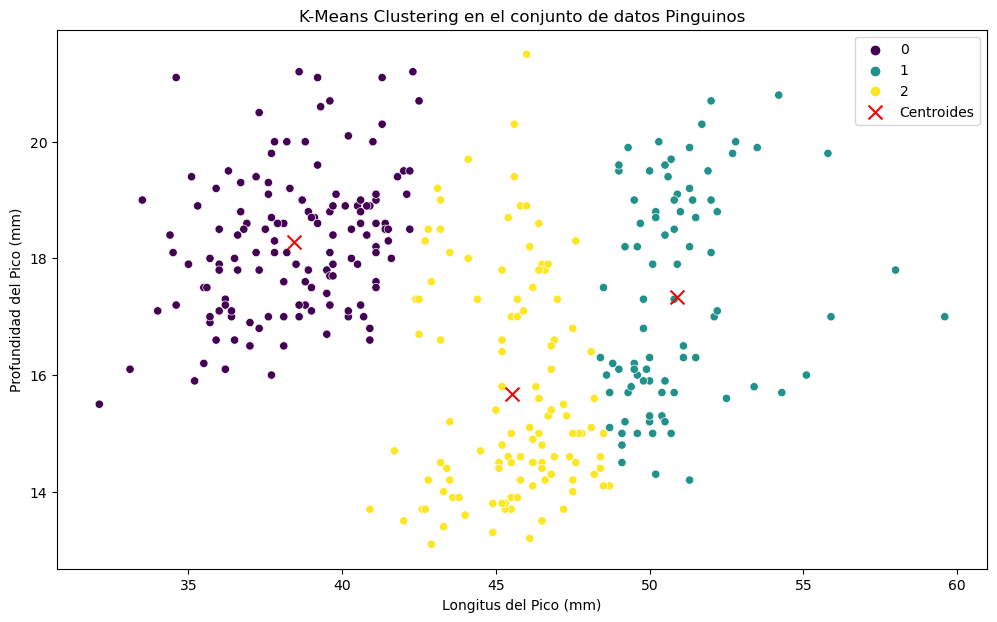

In [12]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=pinguinos, x='bill_length_mm', y='bill_depth_mm', hue=etiquetas, palette='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100, marker='x', label='Centroides')
plt.title('K-Means Clustering en el conjunto de datos Pinguinos')
plt.legend()
plt.xlabel('Longitus del Pico (mm)')
plt.ylabel('Profundidad del Pico (mm)');

Esto ha sido ***K-Means Clustering***, el primer algoritmo que hemos conocido para hacer **Aprendizaje No Supervisado** en **Machine Learning**.

Vamos a aprender el segundo, en la lección siguiente.

Espero que esta lección te haya sido útil y estés listo para aplicar **K-Means** a tus propios problemas de datos. ¡Sigue practicando y explorando las posibilidades!